<!-- Feature extraction
Number of trees/ Hyperparametric tuning
creating a dataframe of best results -->

In [406]:
import random
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin  
from sklearn.ensemble import RandomForestRegressor

In [407]:
train = pd.read_csv(r"D:\W\My Portfolio\ML and AI\soil health monitoring\afsis-soil-properties\train\training.csv")
test = pd.read_csv(r"D:\W\My Portfolio\ML and AI\soil health monitoring\afsis-soil-properties\test\sorted_test.csv")

In [408]:
train.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,...,REF7,RELI,TMAP,TMFI,Depth,Ca,P,pH,SOC,Sand
0,XNhoFZW5,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,...,-0.646673,1.687734,0.190708,0.056843,Topsoil,-0.295749,-0.041336,-1.129366,0.353258,1.269748
1,9XNspFTd,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,...,-0.646673,1.687734,0.190708,0.056843,Subsoil,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
2,WDId41qG,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,...,-0.814516,1.806660,0.190708,0.056843,Topsoil,-0.248601,-0.224635,-0.259551,0.064152,2.091835
3,JrrJf1mN,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,...,-0.814516,1.806660,0.190708,0.056843,Subsoil,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
4,ZoIitegA,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,...,-0.780242,0.430513,0.190708,0.056843,Topsoil,-0.438350,-0.010210,-0.699135,-0.310905,2.164148


In [409]:
test.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,...,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth
0,09gt9UK5,0.210899,0.209221,0.207645,0.208714,0.211972,0.213562,0.211267,0.208248,0.207341,...,-0.009394,0.197885,-0.622545,-0.548238,-0.637681,-0.413306,-0.130139,0.154013,-0.033905,Subsoil
1,0BVvxJ6a,0.191650,0.184120,0.177070,0.180624,0.192343,0.197502,0.187655,0.175447,0.172639,...,-0.277944,-0.851643,-0.792000,-1.058442,-0.792961,-0.785786,-0.588855,0.106200,0.559694,Subsoil
2,0KbdgApg,0.083966,0.074740,0.065596,0.069924,0.085145,0.092527,0.080625,0.064768,0.060597,...,-0.443809,-0.628839,-0.754909,-0.926716,-0.865424,-0.607359,-0.334013,-0.021042,0.182431,Topsoil
3,0MnuuduB,0.345962,0.338567,0.331786,0.336948,0.350820,0.356365,0.345285,0.332233,0.328589,...,-0.758853,-0.961080,-0.729455,-0.780148,-0.716356,-0.552923,-0.079171,0.394936,0.774477,Topsoil
4,0PcIsF9z,0.239019,0.232611,0.226266,0.229921,0.241821,0.247756,0.239242,0.227977,0.224762,...,-1.228289,1.156914,-0.696727,0.080705,0.118012,-0.920363,-0.266055,1.612625,1.199048,Subsoil


In [410]:
train.describe()

,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,...,REF3,REF7,RELI,TMAP,TMFI,Ca,P,pH,SOC,Sand
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,...,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,0.245666,0.240454,0.235631,0.238994,0.248176,0.251674,0.243996,0.235162,0.232874,0.232518,...,-0.661642,-0.638464,0.276786,0.563194,0.746303,0.006442,-0.014524,-0.028543,0.080414,-0.012646
std,0.114439,0.114804,0.115288,0.115075,0.114185,0.113603,0.113974,0.114723,0.115031,0.115021,...,0.365572,0.326460,1.074667,0.649622,0.825242,1.070541,0.995469,0.920224,1.141989,0.988520
min,-0.042260,-0.048559,-0.055518,-0.052353,-0.040608,-0.034516,-0.042619,-0.053856,-0.057699,-0.058482,...,-1.265010,-1.115423,-0.639823,-0.670742,-0.862741,-0.535828,-0.418309,-1.886946,-0.857863,-1.493378
25%,0.171156,0.166020,0.161043,0.164470,0.173065,0.175476,0.169058,0.161094,0.159238,0.158868,...,-0.917184,-0.881048,-0.452939,0.190708,0.056843,-0.451077,-0.345681,-0.717841,-0.615639,-0.899649
50%,0.252899,0.247918,0.244594,0.247920,0.255784,0.258029,0.251061,0.243775,0.241991,0.241599,...,-0.753623,-0.740423,-0.130139,0.316667,0.729111,-0.348682,-0.269595,-0.175376,-0.349974,-0.134651
75%,0.315508,0.310354,0.304742,0.309540,0.317786,0.320834,0.314091,0.304301,0.303235,0.302438,...,-0.445135,-0.432460,0.532450,0.955935,1.414215,-0.042654,-0.089755,0.376442,0.275121,0.786391
max,0.730793,0.725493,0.720711,0.723293,0.731205,0.733872,0.726075,0.717652,0.716443,0.716307,...,0.366460,0.290323,5.612300,2.161892,2.976315,9.645815,13.266841,3.416117,7.619989,2.251685


In [411]:
categorical_cols = train.select_dtypes(include=['object','bool']).columns
categorical_cols

Index(['PIDN', 'Depth'], dtype='object')

In [412]:
missing_values = train.isnull().sum().sum()
print(f'Total number of missing values: {missing_values}')

Total number of missing values: 0


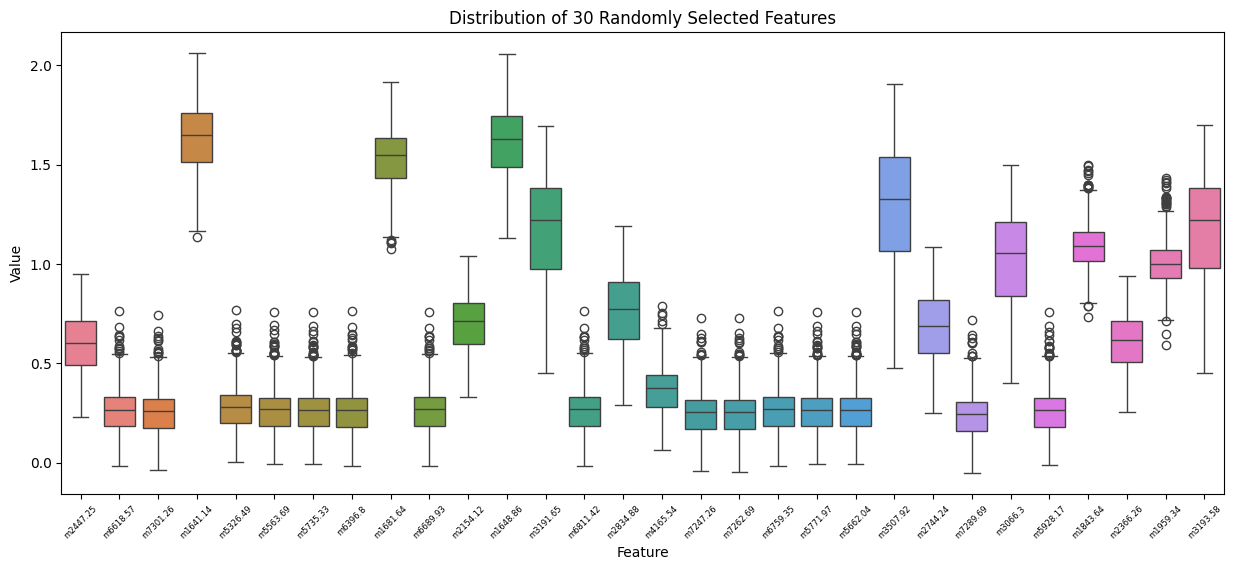

In [413]:
train_numeric = train.copy().drop(categorical_cols, axis=1)
numeric_col_names = list(train_numeric.iloc[:, :-5].columns)

# Select 30 random features
num_of_rand_features = 30
random.seed(42)
rand_features = random.sample(numeric_col_names, num_of_rand_features)

plt.figure(figsize=(15, 6))
sns.boxplot(data=train_numeric[rand_features])
plt.title(f'Distribution of {num_of_rand_features} Randomly Selected Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45, fontsize=6)
plt.show()

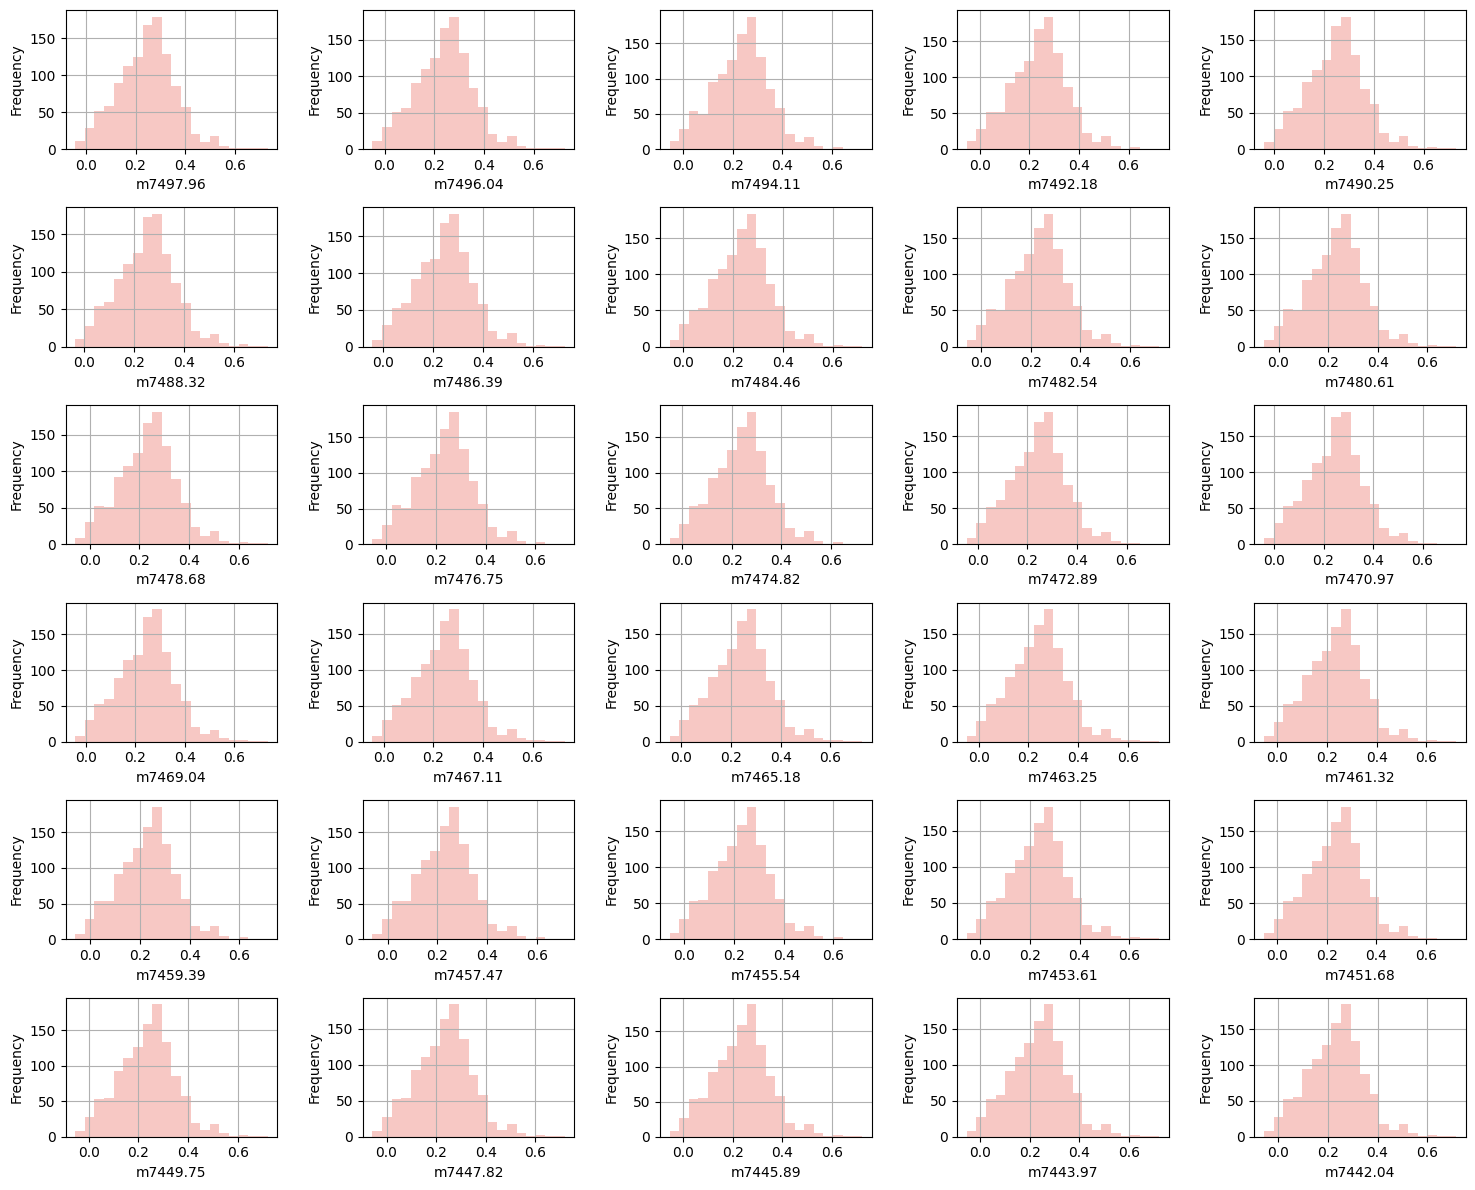

In [414]:
rows, cols = 6, 5  
fig, axes = plt.subplots(rows, cols, figsize=(15, 12)) 

# Plot histograms for randomly selected features
for idx, ax in enumerate(axes.flatten()):
    if idx < len(numeric_col_names):
        feature = numeric_col_names[idx]
        ax.hist(train_numeric[feature], bins=20, color='#F7C8C4')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.grid(True)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [415]:
correlation_mat = train_numeric.corr().abs()

upper_triangle = correlation_mat.where(np.triu(np.ones(correlation_mat.shape),k = 1).astype(np.bool_))

#Set up an array of the columns to be dropped (correlation greater than 95%)
cols_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > .95)]

print(f'Number of strongly correlated coloumns = {len(cols_to_drop)}')

Number of strongly correlated coloumns = 3580


In [416]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

# Define a function to drop columns
def drop_columns(X, cols_to_drop):
    return X.drop(columns=cols_to_drop)

# Create a pipeline using FunctionTransformer
data_cleaning_pipeline = make_pipeline(
    FunctionTransformer(func=lambda X: drop_columns(X, cols_to_drop))  # lambda function wraps drop_columns
)

cleaned_train = data_cleaning_pipeline.fit_transform(train)

In [417]:
cleaned_train.head()

,PIDN,m7497.96,BSAN,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF2,REF3,RELI,TMAP,TMFI,Depth,Ca,P,pH,SOC,Sand
0,XNhoFZW5,0.302553,-0.630435,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.537106,-0.722567,1.687734,0.190708,0.056843,Topsoil,-0.295749,-0.041336,-1.129366,0.353258,1.269748
1,9XNspFTd,0.270192,-0.630435,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.537106,-0.722567,1.687734,0.190708,0.056843,Subsoil,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
2,WDId41qG,0.317433,-0.753623,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.631725,-0.832298,1.806660,0.190708,0.056843,Topsoil,-0.248601,-0.224635,-0.259551,0.064152,2.091835
3,JrrJf1mN,0.261116,-0.753623,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.631725,-0.832298,1.806660,0.190708,0.056843,Subsoil,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
4,ZoIitegA,0.260038,-0.688406,-0.884658,-0.583576,1.276837,1.191691,-1.206971,0.011420,-0.528757,-0.795031,0.430513,0.190708,0.056843,Topsoil,-0.438350,-0.010210,-0.699135,-0.310905,2.164148


In [418]:
Encoder = LabelEncoder()
cleaned_train['Depth'] = Encoder.fit_transform(cleaned_train['Depth'])
cleaned_train['Depth']

0       1
1       0
2       1
3       0
4       1
       ..
1152    1
1153    0
1154    1
1155    0
1156    1
Name: Depth, Length: 1157, dtype: int32

In [419]:
cleaned_train = cleaned_train.drop('PIDN', axis = 1)

In [420]:
from sklearn.preprocessing import StandardScaler

class CustomStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = self.scaler.transform(X_copy[self.columns])
        return X_copy

class CustomOutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=3):
        self.threshold = threshold

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        z_scores = np.abs((X - X.mean()) / X.std())
        return X[(z_scores < self.threshold).all(axis=1)]

In [421]:
data_preprocessing_pipeline = make_pipeline(
    CustomStandardScaler(cleaned_numeric.columns[:-5]),
    CustomOutlierRemover(threshold=3),
)

preprocessed_train = data_preprocessing_pipeline.fit_transform(cleaned_train)
preprocessed_train

,m7497.96,BSAN,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF2,REF3,RELI,TMAP,TMFI,Depth,Ca,P,pH,SOC,Sand
0,0.497310,-0.247019,-0.326426,-0.228256,0.452535,0.532696,-0.441497,0.002965,-0.093329,-0.166730,1.313484,-0.573636,-0.835825,1,-0.295749,-0.041336,-1.129366,0.353258,1.269748
1,0.214409,-0.247019,-0.326426,-0.228256,0.452535,0.532696,-0.441497,0.002965,-0.093329,-0.166730,1.313484,-0.573636,-0.835825,0,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
2,0.627391,-0.769787,-0.843518,-0.636285,0.723843,0.670362,-1.265763,0.004917,-0.380367,-0.467022,1.424195,-0.573636,-0.835825,1,-0.248601,-0.224635,-0.259551,0.064152,2.091835
3,0.135066,-0.769787,-0.843518,-0.636285,0.723843,0.670362,-1.265763,0.004917,-0.380367,-0.467022,1.424195,-0.573636,-0.835825,0,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
4,0.125642,-0.493028,-0.684413,-0.560077,0.532331,0.721586,-1.155664,0.120805,-0.068003,-0.365036,0.143108,-0.573636,-0.835825,1,-0.438350,-0.010210,-0.699135,-0.310905,2.164148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,-0.064383,-0.708285,-0.207098,0.143124,0.543503,-0.595305,-0.199288,-0.536910,-1.162684,-0.699324,0.965535,1.503084,1.056776,1,-0.200296,-0.248844,-0.923603,3.119304,-1.455319
1151,-0.046541,-0.708285,-0.207098,0.143124,0.543503,-0.595305,-0.199288,-0.536910,-1.162684,-0.699324,0.965535,1.503084,1.056776,0,-0.075918,-0.165841,-0.895545,3.322460,-1.394423
1152,-0.333384,-0.646783,-0.286650,0.380791,0.693521,-0.573962,-0.142037,-0.451275,-1.317459,-0.835305,1.392564,1.503084,1.056776,1,-0.319468,-0.307638,-0.895545,3.056795,-0.971962
1153,-0.553281,-0.646783,-0.286650,0.380791,0.693521,-0.573962,-0.142037,-0.451275,-1.317459,-0.835305,1.392564,1.503084,1.056776,0,-0.309633,-0.380266,-0.727194,2.838012,-0.983380


In [422]:
def plot_train_test_score(data, model_name, score, color):
    """
    Plots the score for train and test sets for each class label.

    Parameters:
    data (dict): A dictionary with keys 'Target', 'Train', and 'Test' 
    containing lists of class labels and their corresponding scores.
    """
    df = pd.DataFrame(data)

    # Plotting
    fig, ax = plt.subplots()

    # Bar width
    width = 0.35

    # Setting the positions and width for the bars
    r1 = range(len(df))
    r2 = [x + width for x in r1]

    # Patterns for the bars
    patterns_train = ['--']
    patterns_test = ['/']

    # Creating the bars with patterns
    for i in range(len(df)):
        ax.bar(r1[i], df['Train'][i], color='w', width=width, edgecolor=color, label='Train' if i == 0 else "", hatch=patterns_train[i % len(patterns_train)])
        ax.bar(r2[i], df['Test'][i], color='w', width=width, edgecolor=color, label='Test' if i == 0 else "", hatch=patterns_test[i % len(patterns_test)])

    # Adding labels
    ax.set_xlabel('Target', fontweight='bold')
    ax.set_ylabel(f'Average {score}', fontweight='bold')
    ax.set_title(f'Train/Test - {model_name} - {score}')
    ax.set_xticks([r + width/2 for r in range(len(df))])
    ax.set_xticklabels(df['Target'])

    # Adding legend
    ax.legend()

    # Show plot
    plt.show()

In [423]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin

class CustomRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, model, feature_selection=False, test_size=0.2, random_state=None):
        self.model = model
        self.feature_selection = feature_selection
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        # Fit the model to the training data
        self.model.fit(X_train, y_train)

        # Predict on the test data
        y_pred_test = self.model.predict(X_test)
        y_pred_train = self.model.predict(X_train)

        # Calculate MSE and R² for both test and training sets
        self.mse = mean_squared_error(y_test, y_pred_test)
        self.mse_train = mean_squared_error(y_train, y_pred_train)
        self.r2 = r2_score(y_test, y_pred_test)
        self.r2_train = r2_score(y_train, y_pred_train)

        return self

# Usage example with your Ridge regression code
from sklearn.linear_model import Ridge

# Define target columns and features
target_names = preprocessed_train.iloc[:, -5:].columns
X = preprocessed_train.iloc[:, :-5]

# Define dictionaries to store results
mse_dict = {target_name: {'Lasso_MSE_test': None, 'Ridge_MSE_test': None, 'Ridge_MSE_train': None} for target_name in target_names}
r2_dict = {target_name: {'Lasso_R2_test': None, 'Ridge_R2_test': None, 'Ridge_R2_train': None} for target_name in target_names}

# Iterate over each target variable
for target_name in target_names:
    y = preprocessed_train[target_name]

    # Instantiate the Ridge Regression model
    ridge_model = Ridge(alpha=1.0)

    # Instantiate the CustomRegressor with the Ridge model
    custom_regressor = CustomRegressor(model=ridge_model, feature_selection=False)

    # Fit the model
    custom_regressor.fit(X, y)

    # Store results
    mse_dict[target_name]['Ridge_MSE_test'], mse_dict[target_name]['Ridge_MSE_train'] = custom_regressor.mse, custom_regressor.mse_train
    r2_dict[target_name]['Ridge_R2_test'], r2_dict[target_name]['Ridge_R2_train'] = custom_regressor.r2, custom_regressor.r2_train

# Now `mse_dict` and `r2_dict` will have your test and train MSE and R² values for each target.


In [424]:
for target_name in target_names:

    y = preprocessed_train[target_name]

    # Instantiate the Lasso Regression model
    lasso_model = Lasso(alpha=1.0)

    # Instantiate the CustomRegressor with the preprocessing pipeline and the model
    custom_regressor = CustomRegressor(model=lasso_model)

    # Fit the model
    custom_regressor.fit(X, y)
    average_mse = custom_regressor.mse
    average_r2 = custom_regressor.r2
    average_mse_train = custom_regressor.mse_train
    average_r2_train = custom_regressor.r2_train

    mse_dict[target_name]['Lasso_MSE_test'], mse_dict[target_name]['Lasso_MSE_train'] = average_mse, average_mse_train
    r2_dict[target_name]['Lasso_R2_test'], r2_dict[target_name]['Lasso_R2_train'] = average_r2, average_r2_train

print(pd.DataFrame(mse_dict))
print(pd.DataFrame(r2_dict))

                       Ca         P        pH       SOC      Sand
Lasso_MSE_test   0.271320  0.112059  0.739445  0.653307  0.963465
Ridge_MSE_test   0.241923  0.231643  0.518852  0.337980  0.723402
Ridge_MSE_train  0.172810  0.155651  0.421524  0.388303  0.580880
Lasso_MSE_train  0.307350  0.202805  0.760913  0.743981  0.973646
                      Ca        P        pH       SOC      Sand
Lasso_R2_test  -0.000695 -0.02529 -0.001540 -0.012427 -0.000012
Ridge_R2_test   0.397660  0.03483  0.393636  0.485458  0.281787
Ridge_R2_train  0.369358  0.08721  0.423917  0.477143  0.396177
Lasso_R2_train  0.000000  0.00000  0.000000  0.000000  0.000000


In [425]:
for target_name in target_names:

    y = preprocessed_train[target_name]

    # Instantiate the Lasso Regression model
    lasso_model = Lasso(alpha=.01)

    # Instantiate the CustomRegressor with the preprocessing pipeline and the model
    custom_regressor = CustomRegressor(model=lasso_model)

    # Fit the model
    custom_regressor.fit(X, y)
    average_mse = custom_regressor.mse
    average_r2 = custom_regressor.r2
    average_mse_train = custom_regressor.mse_train
    average_r2_train = custom_regressor.r2_train

    mse_dict[target_name]['Lasso_MSE_test'], mse_dict[target_name]['Lasso_MSE_train'] = average_mse, average_mse_train
    r2_dict[target_name]['Lasso_R2_test'], r2_dict[target_name]['Lasso_R2_train'] = average_r2, average_r2_train

print(pd.DataFrame(mse_dict))
print(pd.DataFrame(r2_dict))

                       Ca         P        pH       SOC      Sand
Lasso_MSE_test   0.212184  0.161866  0.500400  0.463269  0.629821
Ridge_MSE_test   0.241923  0.231643  0.518852  0.337980  0.723402
Ridge_MSE_train  0.172810  0.155651  0.421524  0.388303  0.580880
Lasso_MSE_train  0.189869  0.176678  0.436947  0.369706  0.612334
                      Ca         P        pH       SOC      Sand
Lasso_R2_test   0.182850  0.041956  0.406203  0.454676  0.367752
Ridge_R2_test   0.397660  0.034830  0.393636  0.485458  0.281787
Ridge_R2_train  0.369358  0.087210  0.423917  0.477143  0.396177
Lasso_R2_train  0.387864  0.062233  0.405477  0.466846  0.365753


In [426]:
for target_name in target_names:

    y = preprocessed_train[target_name]

    # Instantiate the RF Regression model
    rf_regressor = RandomForestRegressor()

    # Instantiate the CustomRegressor
    custom_regressor = CustomRegressor(model=rf_regressor)

    # Fit the model
    custom_regressor.fit(X, y)
    average_mse = custom_regressor.mse
    average_r2 = custom_regressor.r2
    average_mse_train = custom_regressor.mse_train
    average_r2_train = custom_regressor.r2_train

    mse_dict[target_name]['RF_MSE_test'], mse_dict[target_name]['RF_MSE_train'] = average_mse, average_mse_train
    r2_dict[target_name]['RF_R2_test'], r2_dict[target_name]['RF_R2_train'] = average_r2, average_r2_train

In [427]:
print(pd.DataFrame(mse_dict))
print(pd.DataFrame(r2_dict))

                       Ca         P        pH       SOC      Sand
Lasso_MSE_test   0.212184  0.161866  0.500400  0.463269  0.629821
Ridge_MSE_test   0.241923  0.231643  0.518852  0.337980  0.723402
Ridge_MSE_train  0.172810  0.155651  0.421524  0.388303  0.580880
Lasso_MSE_train  0.189869  0.176678  0.436947  0.369706  0.612334
RF_MSE_test      0.132751  0.184771  0.192452  0.260107  0.213147
RF_MSE_train     0.009637  0.017062  0.028034  0.027062  0.022843
                      Ca         P        pH       SOC      Sand
Lasso_R2_test   0.182850  0.041956  0.406203  0.454676  0.367752
Ridge_R2_test   0.397660  0.034830  0.393636  0.485458  0.281787
Ridge_R2_train  0.369358  0.087210  0.423917  0.477143  0.396177
Lasso_R2_train  0.387864  0.062233  0.405477  0.466846  0.365753
RF_R2_test      0.457417  0.329803  0.781146  0.669730  0.780457
RF_R2_train     0.969310  0.893537  0.961352  0.961802  0.976490


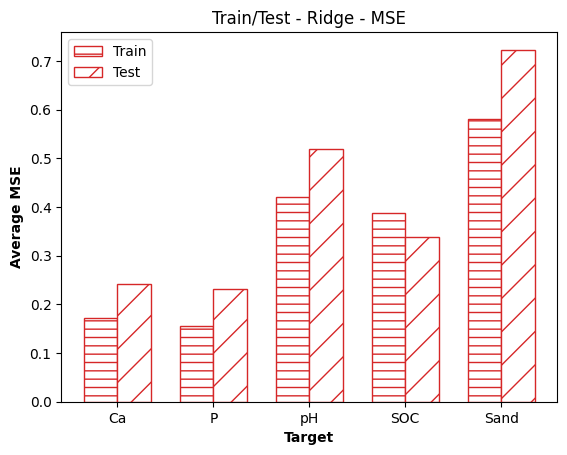

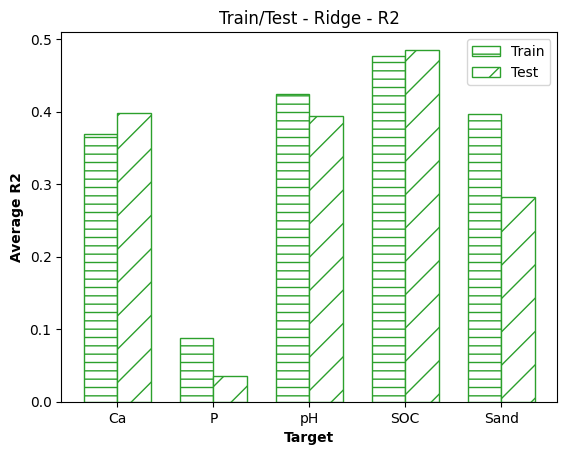

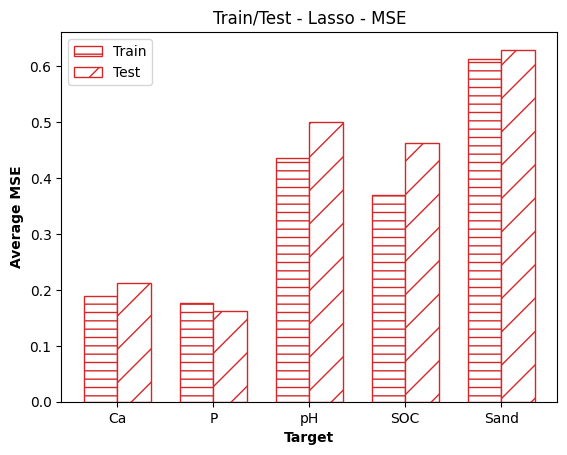

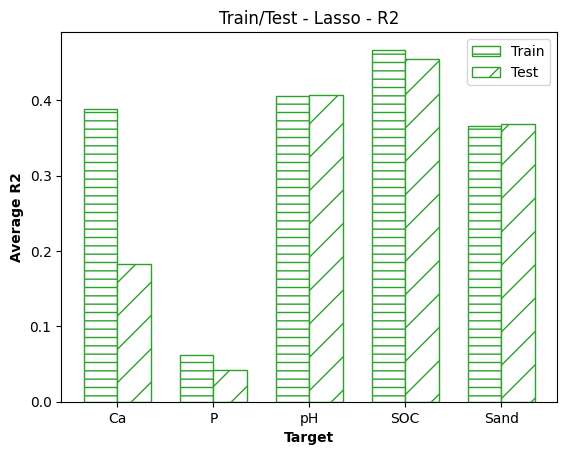

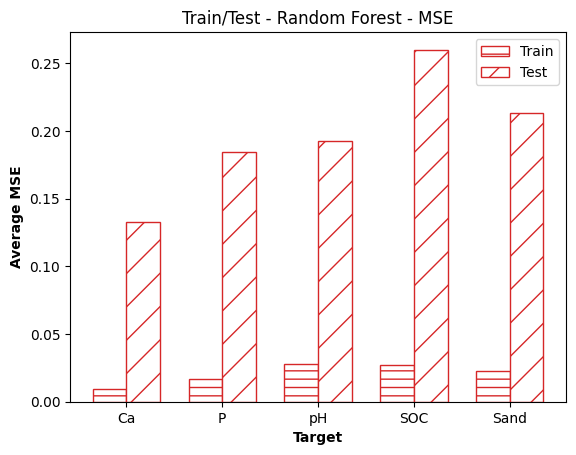

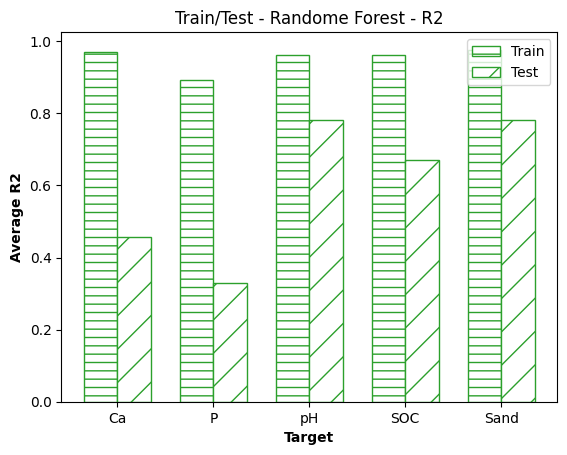

In [428]:
ridge_train_test_mse = {'Target': target_names, 
                        'Train': [mse_dict[target_name]['Ridge_MSE_train'] for target_name in target_names], 
                        'Test': [mse_dict[target_name]['Ridge_MSE_test'] for target_name in target_names]}
plot_train_test_score(ridge_train_test_mse, 'Ridge', 'MSE', color='#d62728')

ridge_train_test_r2 = {'Target': target_names, 
                        'Train': [r2_dict[target_name]['Ridge_R2_train'] for target_name in target_names], 
                        'Test': [r2_dict[target_name]['Ridge_R2_test'] for target_name in target_names]}
plot_train_test_score(ridge_train_test_r2, 'Ridge', 'R2', color='#2ca02c')


lasso_train_test_mse = {'Target': target_names, 
                        'Train': [mse_dict[target_name]['Lasso_MSE_train'] for target_name in target_names], 
                        'Test': [mse_dict[target_name]['Lasso_MSE_test'] for target_name in target_names]}
plot_train_test_score(lasso_train_test_mse, 'Lasso', 'MSE', color='#d62728')

lasso_train_test_r2 = {'Target': target_names, 
                        'Train': [r2_dict[target_name]['Lasso_R2_train'] for target_name in target_names], 
                        'Test': [r2_dict[target_name]['Lasso_R2_test'] for target_name in target_names]}
plot_train_test_score(lasso_train_test_r2, 'Lasso', 'R2', color='#2ca02c')





rf_train_test_mse = {'Target': target_names, 
                     'Train': [mse_dict[target_name]['RF_MSE_train'] for target_name in target_names], 
                     'Test': [mse_dict[target_name]['RF_MSE_test'] for target_name in target_names]}
plot_train_test_score(rf_train_test_mse, 'Random Forest', 'MSE', color='#d62728')

rf_train_test_r2 = {'Target': target_names, 
                     'Train': [r2_dict[target_name]['RF_R2_train'] for target_name in target_names], 
                     'Test': [r2_dict[target_name]['RF_R2_test'] for target_name in target_names]}
plot_train_test_score(rf_train_test_r2, 'Randome Forest', 'R2', color='#2ca02c')
